In [190]:
%load_ext tensorboard

In [1]:
import wget
import os
import pickle
import tarfile
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

# Набор данных CIFAR10
<a href="https://www.cs.toronto.edu/~kriz/cifar.html">**CIFAR10** </a> - классическиq наборq данных для решения задач классификации обучения с учителем.  Наборq данных былq составлены экспертами из департамента Computer Science университета Торонто *Alex Krizhevsky*, *Vinod Nair*, и *Geoffrey Hinton*. 

Набор данных **CIFAR10** содержит 60000 цветных(RGB) изображений размером 32х32 пикселя из 10 классов. Количество изображений по классам распределено равномерно. Каждый класс содержит по 6000 соответствующих изображений. Набор данных разделен на **train** и **test** подмножества в соотношении 50000 и 10000 изображений. Эти классы полностью взаимоисключают друг друга. Между легковыми и грузовыми автомобилями нет перекрытия. "Автомобиль" включает в себя седаны, внедорожники и тому подобное. "Грузовик" включает в себя только большие грузовики. Ни то, ни другое не включает в себя пикапы.

### Пример из случайных 10 изображений каждого класса:
<table>
    <tbody style="td { display: table-cell; vertical-align: inherit;}">
        <tr>
            <td class="cifar-class-name">airplane</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">automobile</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">bird</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">cat</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">deer</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">dog</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">frog</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">horse</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">ship</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample"></td>
        </tr>
        <tr>
            <td class="cifar-class-name">truck</td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample"></td>
            <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample"></td>
        </tr>
    </tbody>
</table>

## Структура набора данных

Набор данных  **CIFAR10** предоставляются ввиде архива, который содержит 3 *pickle* файла в бинарном формате:
<table>
    <tbody>
        <tr>
            <td><b>Имя файла</b></td><td><b>Описание</b></td>
        </tr>
        <tr>
            <td>train</td><td>Содержит тренировочный набор данных в бинарном формате<td>
        </tr>
        <tr>
            <td>test</td><td>Содержит тестовый набор данных в бинарном формате<td>
        </tr>
        <tr>
            <td>meta</td><td>Содержит мета информацию о наборе данных. Например: список названий меток<td>
        </tr>
    </tbody>
</table>

*Pickle* файлы с тренировочными и тестовыми данными имеют одинаковую структуру. Отличие лишь в самих данных и их количестве.

### Структура train и test наборов

При распаковке pickle файла в Python окружение мы получим словарь(dict). Словарь по сути является таблицей вида:

```
dict {
    str(filenames):     List[str], size == N
    str(batch_label):   str
    str(fine_labels):   List[int], size == N
    str(coarse_labels): List[int], size == N
    str(data):          np.ndarray((N, 3072))
}
```

#### Краткое описание каждого ключа словаря:
<table>
    <tbody>
        <tr>
            <td><b>Ключ</b></td>
            <td><b>Тип</b></td>
            <td><b>Описание</b></td>
        </tr>
        <tr>
            <td>filenames</td>
            <td>List of string</td>
            <td>Уникальные имена файлов с изображением для идентификации конкретного изображения и сохранения.<td>
        </tr>
        <tr>
            <td>batch_label</td>
            <td>String</td>
            <td>Строковое описание к какому из пакетов принадлежит данный набор. В случае **CIFAR100** всегда является 'training batch 1 of 1' или 'testing batch 1 of 1'<td>
        </tr>
        <tr>
            <td>fine_labels</td>
            <td>List of int</td>
            <td>Идентификатор класса принадлежащий к i-му изображению.<td>
        </tr>
        <tr>
            <td>coarse_labels</td>
            <td>List of int</td>
            <td>Идентификатор суперкласса принадлежащий к i-му изображению.<td>
        </tr>
        <tr>
            <td>coarse_labels</td>
            <td>Numpy ND Array</td>
            <td>Числовые массивы описывающие изображения в формате RGB. (См. далее)<td>
        </tr>
</table>

#### Подробнее о ключе **data**:

По ключу **data** можно получить *numpy.ndarray* который содержит N "векторов". Каждый из векторов - отдельное изображение из набора данных.

```
>>> train_data, test_data, _ = load_CIFAR100()

>>> type(train_data)              --> dict
>>> train_data.keys()             --> dict_keys(['filenames', 'batch_label', 'fine_labels', 'coarse_labels', 'data'])

>>> data = train_data['data']
>>> data.shape                    --> (50000, 3072)
>>> data[0]                       --> array([255, 255, 255, ...,  10,  59,  79], dtype=uint8)
```

Каждый вектор можно представить в виде 32х32 RGB изображения. Первые 1024 элемента содержат в себе 32x32 значения для *Red* канала, следующие 1024 элемента - *Blue*, и последние - *Green*. Таким образом простым преобразованием ```numpy.reshape``` мы можем получить представление в виде 3x32x32:

```
>>> data = data.reshape(50000, 32, 32, 3)   -->   50000 изображение формата HxWxC.
```

## Структура meta файла

При распаковке pickle файла в Python окружение мы получим словарь(dict). Словарь по сути является таблицей вида:

```
dict {
    str(fine_label_names):   List[str], size == 20
    str(coarse_label_names): List[str], size == 100
}
```

#### Краткое описание каждого ключа словаря:
<table>
    <tbody>
        <tr>
            <td><b>Ключ</b></td>
            <td><b>Тип</b></td>
            <td><b>Описание</b></td>
        </tr>
        <tr>
            <td>fine_label_names</td>
            <td>List of string</td>
            <td>Строковые названия меток классов. Например: fine_label_names[0] == 'apple'<td>
        </tr>
        <tr>
            <td>coarse_label_names</td>
            <td>List of string</td>
            <td>Строковые названия меток суперклассов. Например: coarse_label_names[0] == 'aquatic_mammals'<td>
        </tr>
</table>

## Где используется набор данных

Традиционно эти два набора данных используются в качестве Benchmark для задачи классификации при крайне низком разрешении изображения. В качестве примеров статей можно привести этот список:

- <a href="https://paperswithcode.com/paper/efficient-adaptive-ensembling-for-image/review/?hl=72498">Efficient Adaptive Ensembling for Image Classification</a>
- <a href="https://paperswithcode.com/paper/sharpness-aware-minimization-for-efficiently-1/review/?hl=21322">Sharpness-Aware Minimization for Efficiently Improving Generalization</a>
- <a href="https://paperswithcode.com/paper/large-scale-learning-of-general-visual/review/?hl=9483">Big Transfer (BiT): General Visual Representation Learning</a>
- <a href="https://paperswithcode.com/paper/efficientnet-rethinking-model-scaling-for">EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks</a>
- <a href="https://paperswithcode.com/paper/gpipe-efficient-training-of-giant-neural">GPipe: Efficient Training of Giant Neural Networks using Pipeline Parallelism</a>

и во множестве других статей и работ.

# Загрузка набора данных

Набор данных **CIFAR100** предоставляется в 3х видах:

<table>
    <tbody>
        <tr>
            <td><b>Вид данных</b></td>
            <td><b>Прямая ссылка</b></td>
            <td><b>Размер</b></td>
            <td><b>md5sum</b></td>
        </tr>
        <tr>
            <td>CIFAR-10 python version</td>
            <td><a href="https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz">Link</a></td>
            <td>161 MB</td>
            <td>c58f30108f718f92721af3b95e74349a<td>
        </tr>
        <tr>
            <td>CIFAR-10 Matlab version</td>
            <td><a href="https://www.cs.toronto.edu/~kriz/cifar-10-matlab.tar.gz">Link</a></td>
            <td>175 MB</td>
            <td>70270af85842c9e89bb428ec9976c926<td>
        </tr>
        <tr>
            <td>CIFAR-10 binary version(C)</td>
            <td><a href="https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz">Link</a></td>
            <td>161 MB</td>
            <td>c32a1d4ab5d03f1284b67883e8d87530<td>
        </tr>
        </tbody>
</table>

Загрузка данных из источника делится на 3 этапа:
1. Скачивание архива
2. Распаковка архива
3. Загрузка данных в Python с помощью Pickle.

In [2]:
CIFAR10_URL="https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

In [151]:
def download_CIFAR10() -> str:
    """
    Загрузка архива с набором данных CIFAR-10.
    Return:
        str - путь к скачанному архиву.
    """
    print("Start downloading dataset: CIFAR 100.")
    print("Load from URL:", CIFAR10_URL)
    
    archive_path = wget.download(CIFAR10_URL)
    print()
    print("Downloaded to archive:", archive_path)
    return archive_path

def unpack_archive(archive_path: str) -> str:
    """
    Распаковка архива по указанному пути.
    Примечание: Архив должен иметь формат *.tar или *.tar.gz
    Inputs:
        archive_path [str] - Путь к архиву который нужно распаковать.
    Return:
        str - путь к директории куда был распакован архив
    """
    readmode = 'r:'
    if archive_path.endswith('.tar.gz'):
        readmode += "gz"
    
    tar = tarfile.open(archive_path, readmode)
    tar.extractall()
    tar.close()
    
    os.remove(archive_path)
    directory_with_data = os.path.abspath(archive_path).replace(".tar", "").replace(".gz", "")
    print("Unpacked to:", directory_with_data)
    
    return directory_with_data
    
    
def load_from_pickle_CIFAR10(directory_with_data: str):
    """
    Загрузить набор данных CIFAR-10 из pickle файлов.
    Inputs:
        directory_with_data [str] - Директория в которой расположены файлы набора данных. Директория обязательно должна содержать файлы train, test, meta.
    Return:
        Tuple[Dict, Dict, Dict] - Распакованные наборы Train, Test, Meta.
    """
    def unpickle(file):
        fo = open(file, 'rb')
        dict = pickle.load(fo, encoding='latin1')
        fo.close()
        return dict
    
    train_data = unpickle(os.path.join(directory_with_data, ("data_batch_" + str(1)))).copy()
    print("data_batch_1 is loading...")  
    for j in range(2, 6):  # Прочитайте файл data_batch12345 в каталоге
        key = ['batch_label', 'labels', 'data', 'filenames']
        pol = unpickle(os.path.join(directory_with_data, ("data_batch_" + str(j))))
        b={key[0]:(train_data[key[0]]+pol[key[0]]),key[1]:(train_data[key[1]]+pol[key[1]]),key[2]:np.concatenate((train_data[key[2]], pol[key[2]]),axis=0),key[3]:(train_data[key[3]]+pol[key[3]])}
        train_data=b
        print("data_batch_" + str(j) + " is loading...")  

    test_data  = unpickle(os.path.join(directory_with_data, "test_batch"))
    meta_data  = unpickle(os.path.join(directory_with_data, "batches.meta"))
    
    return train_data, test_data, meta_data

Стадия загрузки и распаковки архива

In [4]:
archive = download_CIFAR10()
unpack_archive(archive)

Start downloading dataset: CIFAR 100.
Load from URL: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Downloaded to archive: cifar-10-python.tar.gz
Unpacked to: c:\Users\pacha\Documents\GitHub\homework\AI\jobFoDataset\cifar-10-python


'c:\\Users\\pacha\\Documents\\GitHub\\homework\\AI\\jobFoDataset\\cifar-10-python'

Стадия загрузки из Pickle

In [152]:
train_data, test_data, meta_data = load_from_pickle_CIFAR10("cifar-10-batches-py")

data_batch_1 is loading...
20000
data_batch_2 is loading...
30000
data_batch_3 is loading...
40000
data_batch_4 is loading...
50000
data_batch_5 is loading...


In [153]:
len(train_data['labels']+train_data['labels'])
a=(train_data['data']+train_data['data'])
print(len(train_data['data']))
l=train_data['data'].copy()
print(train_data['data'].shape)
s=np.concatenate((train_data['data'], train_data['data']),axis=0)
np.concatenate((s, train_data['data']),axis=0).shape

50000
(50000, 3072)


(150000, 3072)

## Визуализация примеров из набора данных

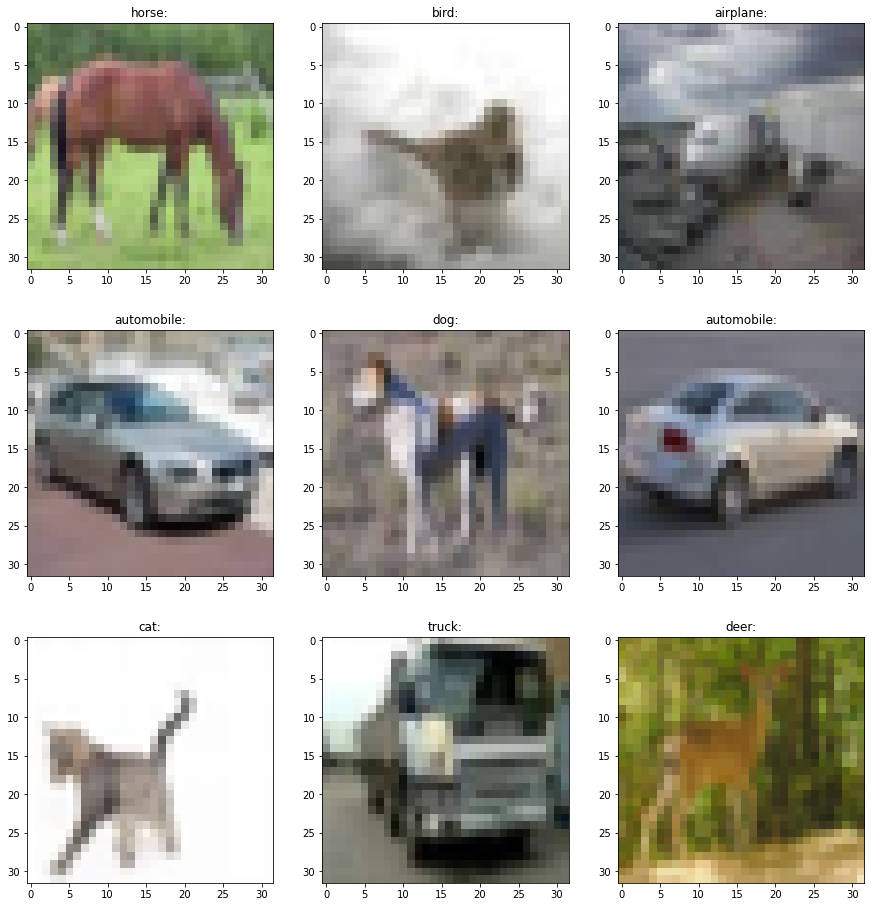

In [154]:
nrows = 3
ncols = 3
samples_ids = np.random.randint(0, len(train_data['data']), size=nrows * ncols).reshape(nrows, ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 16))

for i in range(nrows):
    for j in range(ncols):
        
        sample_id = samples_ids[i, j]
        sample = train_data['data'][sample_id].reshape((3, 32, 32)).transpose(1, 2, 0)
        ax[i][j].imshow(sample)
        
        title = f"{meta_data['label_names'][train_data['labels'][sample_id]]}:"
        ax[i][j].set_title(title)

# Статистика набора данных с использованием Plotly

In [155]:
train_data['data'] = [sample for sample in train_data['data']]
test_data['data'] = [sample for sample in test_data['data']]

In [156]:
train_df = pd.DataFrame(data=train_data, columns=list(train_data.keys()))
train_df.drop(labels=['batch_label'], axis=1)

,labels,data,filenames
0,6,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",leptodactylus_pentadactylus_s_000004.png
1,9,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",camion_s_000148.png
2,9,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",tipper_truck_s_001250.png
3,4,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",american_elk_s_001521.png
4,1,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",station_wagon_s_000293.png
...,...,...,...
49995,2,"[145, 151, 156, 155, 153, 153, 157, 161, 161, ...",wagtail_s_001418.png
49996,6,"[255, 254, 255, 254, 254, 254, 254, 253, 254, ...",toad_s_002300.png
49997,9,"[35, 40, 42, 39, 43, 45, 48, 51, 53, 56, 58, 5...",tipper_s_000416.png
49998,1,"[189, 186, 185, 184, 182, 181, 180, 180, 181, ...",coupe_s_001887.png


In [159]:
fig = px.histogram(train_df, x='labels', title='Баланc классов(меток) по набору данных')
fig.show()

Как видно из гистограмм выше, все классы  распределены равномерно. При этом к каждой метке класса сопоставлено по 5000 изображений из трегировочного набора.

In [161]:
def extract_channel(array, channel_id):
    return array.reshape(3, 32 * 32)[channel_id].reshape(32 * 32)
    
histograms = {
    "red": np.zeros((256), dtype=np.int32),
    "green": np.zeros((256), dtype=np.int32),
    "blue": np.zeros((256), dtype=np.int32)
}

for i, row in train_df.iterrows():
    data = row['data']
    histograms['red'] += np.histogram(extract_channel(data, 0), bins=256)[0]
    histograms['green'] += np.histogram(extract_channel(data, 1), bins=256)[0]
    histograms['blue'] += np.histogram(extract_channel(data, 2), bins=256)[0]

In [162]:
df = pd.DataFrame(data=histograms, index=[i for i in range(256)])

In [163]:
px.bar(df, title='Распределение пикселей по набору данных')

# Применение модели из открытых источников к набору данных

## <a href="https://github.com/atagade/CIFAR-100-Classification/blob/master/cifar-100_CNN.ipynb" target="_blank">GitHub: CIFAR-10 CNN</a>

Используется простейшая сверточная нейронная сеть для решения задачи классификации на наборе данных CIFAR-10.

In [164]:
import datetime
import numpy as np
from sklearn import metrics

import tensorflow as tf
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Подготовка данных.

Изображения приводятся к формату ```np.ndarray((3, 32, 32))```. К меткам применяется <a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical?hl=en"><b>One-hot encoding</b></a>.

In [167]:
train_dec, test_dec, meta_dec = load_from_pickle_CIFAR10("cifar-10-batches-py")

train_data = np.array([train_dec['data'][i].reshape(3, 32, 32).transpose(1, 2, 0) for i in range(len(train_dec['data']))])
test_data = np.array([test_dec['data'][i].reshape(3, 32, 32).transpose(1, 2, 0) for i in range(len(test_dec['data']))])
train_labels = np.array([[label] for label in train_dec['labels']], dtype=np.int64)
test_labels = np.array([[label] for label in test_dec['labels']], dtype=np.int64)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('==================== Prepared data shapes =================')
print('Train data shape:', train_data.shape)
print('Test  data shape:', test_data.shape)
print('Train labels shape:', train_labels.shape)
print('Test  labels shape:', test_labels.shape)

data_batch_1 is loading...
20000
data_batch_2 is loading...
30000
data_batch_3 is loading...
40000
data_batch_4 is loading...
50000
data_batch_5 is loading...
==================== Prepared data shapes =================
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 10)
Test  labels shape: (10000, 10)


### Реализация пайплайна модели.

Модель имеет простейший препроцессинг: Нормализация данных. Формула: $X_i = \frac{X_i}{255}$
Выход модели представляет собой вектор из 10 float значений которые обладают свойством: $\sum_{i=1}^{20}x_i = 1$, что позволяет интерпретировать этот вектор как вектор оценок вероятностей принадлежности изображения к классу определенный моделью.

In [174]:
class ModelPipeline:
    """
    Базовый класс реализующий пайплайн модели классификации над набором данных CIFAR-100 [Суперклассы].
    """
    def __init__(self, weights_path: str=''):
        """
        Инициализация модели.
        Inputs:
            weights_path [str] - Путь к файлу с весами модели. Если он не указан, то инициализация пройдет с нулевыми весами.
                                 Default: ''
        """
        self.tfmodel = keras.Sequential()
        self.model_weights_path = weights_path
        
        self.__data_scale__ = 255.0
        self.__init_model__()
        
        
    def __init_model__(self):
        self.tfmodel.add(Conv2D(32, kernel_size = (3,3), activation='relu', padding = 'same', input_shape = (32,32,3))) 
        self.tfmodel.add(MaxPooling2D((2, 2)))
        self.tfmodel.add(Conv2D(64, kernel_size = (3,3), activation='relu', padding = 'same')) 
        self.tfmodel.add(MaxPooling2D((2, 2)))
        self.tfmodel.add(Conv2D(128, kernel_size = (3,3), activation='relu', padding = 'same'))
        self.tfmodel.add(MaxPooling2D((2, 2)))
          
        self.tfmodel.add(Flatten())
        self.tfmodel.add(Dense(128, activation='relu'))
        self.tfmodel.add(Dense(20, activation='softmax'))
        
        print("Inited model:")
        self.tfmodel.summary()
        optimizer = Adam(learning_rate=0.003)
        self.tfmodel.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        
        if self.model_weights_path:
            self.tfmodel.load_weights(self.model_weights_path)
            print("Model weights loaded:", self.model_weights_path)
        self.tfmodel.add(Dense(10, activation='softmax'))
    
    def __preprocessing__(self, sample):
        return sample / self.__data_scale__
    
    def evaluate(self, data: np.ndarray, labels: np.ndarray):
        """
        Валидирование модели.
        Inputs:
            data   [np.ndarray] - Набор из изображений для валидации. Должен состоять из N изображений 32х32х3.
            labels [np.ndarray] - Соответсвующая набору data разметка данных по суперклассам.
        Return:
            Tuple[float, float] - Кортеж:
                                  0 [float] - Значение Loss функции для проведенного замера точности.
                                  1 [float] - Значение Accuracy для проведенного замера точности.
        """
        return self.tfmodel.evaluate(self.__preprocessing__(data), labels)
    
    def prediction(self, data: np.ndarray):
        """
        Inputs:
            data [np.ndarray] - Набор из изображений для предсказания меток. Должен состоять из N изображений 32x32x3.
        Return:
            np.ndarray - Массив вида np.ndarray(N, 10). По первой оси - индекс соответствующий изображению из data. 
                         По второй оси - 10 float элементов. i-й элемент показывает оценку вероятности принадлежности изображения к i-ой метке.
        """
        return self.tfmodel.predict(self.__preprocessing__(data))

In [175]:
MODEL_WEIGTHS_PATH = r'./model/CNN_best_acc.hdf5'

pipeline = ModelPipeline(MODEL_WEIGTHS_PATH)

Inited model:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 

### Тестирование модели и визуализация

In [176]:
loss, accuracy = pipeline.evaluate(test_data, test_labels)
print('Test accuracy = '+str(accuracy)+' Test Loss = '+str(loss))

313/313 [==============================] - 9s 20ms/step - loss: 2.2986 - accuracy: 0.1121
Test accuracy = 0.11209999769926071 Test Loss = 2.298633575439453


In [179]:
predicts = pipeline.prediction(test_data)
predictions_labels = [(meta_dec['label_names'][np.argmax(predicts[i])], np.max(predicts[i])) for i in range(len(predicts))]

313/313 [==============================] - 6s 20ms/step


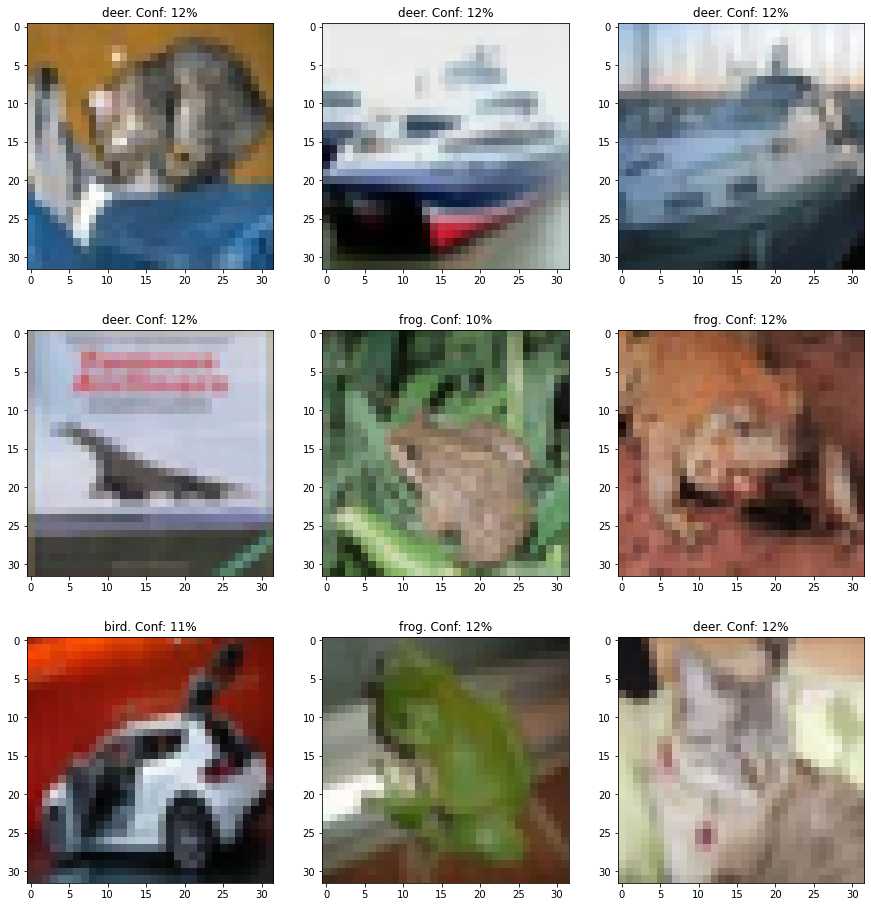

In [180]:
nrows = 3
ncols = 3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 16))

for i in range(nrows):
    for j in range(ncols):
        
        idx = i * ncols + j
        sample = test_data[idx]
        ax[i][j].imshow(sample)
        
        title = f"{predictions_labels[idx][0]}. Conf: {int(round(predictions_labels[idx][1], 2) * 100)}%"
        
        ax[i][j].set_title(title)

# Использование Tensorboard

На простом примере продемонстирую как используется Tensorboard доска

In [183]:
train_dec, test_dec, meta_dec = load_from_pickle_CIFAR10("cifar-10-batches-py")

train_data = np.array([train_dec['data'][i].reshape(3, 32, 32).transpose(1, 2, 0) for i in range(len(train_dec['data']))])
test_data = np.array([test_dec['data'][i].reshape(3, 32, 32).transpose(1, 2, 0) for i in range(len(test_dec['data']))])
train_labels = np.array([[label] for label in train_dec['labels']], dtype=np.int64)
test_labels = np.array([[label] for label in test_dec['labels']], dtype=np.int64)

print('Train data shape:', train_data.shape)
print('Test  data shape:', test_data.shape)
print('Train labels shape:', train_labels.shape)
print('Test  labels shape:', test_labels.shape)

data_batch_1 is loading...
20000
data_batch_2 is loading...
30000
data_batch_3 is loading...
40000
data_batch_4 is loading...
50000
data_batch_5 is loading...
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)
Train labels shape: (50000, 1)
Test  labels shape: (10000, 1)


In [184]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(64, kernel_size=(1, 1), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(128, kernel_size=(1, 1), activation="relu", padding="same"),
        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [186]:
def train_model():
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    model.fit(x=x_train, 
            y=y_train, 
            epochs=3,
            validation_data=(x_test, y_test), 
            callbacks=[tensorboard_callback])
    return model

In [187]:
x_train, x_test = train_data / 255.0, test_data / 255.0
y_train, y_test = train_labels, test_labels
model = train_model()

Epoch 1/3
1563/1563 [==============================] - 274s 163ms/step - loss: 1.5467 - accuracy: 0.4360 - val_loss: 1.2838 - val_accuracy: 0.5454
Epoch 2/3
1563/1563 [==============================] - 351s 224ms/step - loss: 1.0908 - accuracy: 0.6127 - val_loss: 1.0331 - val_accuracy: 0.6345
Epoch 3/3
1563/1563 [==============================] - 352s 225ms/step - loss: 0.8906 - accuracy: 0.6873 - val_loss: 0.9135 - val_accuracy: 0.6774


In [193]:
%tensorboard --logdir ./logs/

### Tensorboard output:
![Демонстрация результата в Tensorboard](tensorboard_demo.png)